In [1]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import string

In [2]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to C:\Users\Devendra
[nltk_data]     Nemade\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Devendra
[nltk_data]     Nemade\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
# Initialize stopwords, stemmer, and punctuation set
stop_words = set(stopwords.words('english'))
punctuation_set = set(string.punctuation)
stemmer = PorterStemmer()
# Your preprocessing function
def preprocess_text(text):
    # Assuming stop_words, punctuation_set, and stemmer are already initialized
    tokens = word_tokenize(text)
    processed_tokens = [stemmer.stem(word.lower()) for word in tokens if word.lower() not in stop_words and word not in punctuation_set]
    return ' '.join(processed_tokens)

# Fetch dataset
newsgroups_dataset = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'), random_state=42)
data = newsgroups_dataset.data

# Preprocess all documents
processed_data = [preprocess_text(doc) for doc in data]

# Initialize TF-IDF Vectorizer
tfidf_vectorizer = CountVectorizer(max_df=0.85, stop_words='english', max_features=100)

# Fit and transform the processed data
tfidf_matrix = tfidf_vectorizer.fit_transform(processed_data)


In [4]:
n_components = 100
svd = TruncatedSVD(n_components=n_components, random_state=42)
tfidf_matrix_reduced = svd.fit_transform(tfidf_matrix)

In [5]:
kmeans = KMeans(n_clusters=2)

kmeans.fit(tfidf_matrix_reduced)
labels=kmeans.labels_
silhouette = silhouette_score(tfidf_matrix_reduced, labels)
davies_bouldin = davies_bouldin_score(tfidf_matrix_reduced, labels)
calinski_harabasz = calinski_harabasz_score(tfidf_matrix_reduced, labels)

print(f"Silhouette Score: {silhouette}")
print(f"Davies-Bouldin Index: {davies_bouldin}")
print(f"Calinski-Harabasz Index: {calinski_harabasz}")

C:\Users\Devendra Nemade\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score: 0.9986457855954993
Davies-Bouldin Index: 0.2786293300243898
Calinski-Harabasz Index: 106797.83628978906


In [6]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.decomposition import PCA
silhouette_scores = []
davies_bouldin_scores = []
calinski_harabasz_scores = []
for n_clusters in range(2, 21):
    # Run PSO-KMeans with the current number of clusters
    kmeans = KMeans(n_clusters)
    kmeans.fit(tfidf_matrix_reduced)
    labels=kmeans.labels_

    # Calculate metrics
    silhouette = silhouette_score(tfidf_matrix_reduced, labels)
    davies_bouldin = davies_bouldin_score(tfidf_matrix_reduced,labels)
    calinski_harabasz = calinski_harabasz_score(tfidf_matrix_reduced,labels)

    # Store metrics
    silhouette_scores.append(silhouette)
    print(silhouette)
    davies_bouldin_scores.append(davies_bouldin)
    calinski_harabasz_scores.append(calinski_harabasz)

0.9986457855954993
0.997940135923708
0.9977050194897645
0.997283505701036
0.9972831778045049
0.9972806158700285
0.9517296151515666
0.9516719444355798
0.9320094781522216
0.9113109614501699
0.9253148617751695
0.9332903065702035
0.9321242064848135
0.8384852319803683
0.7900727313961846
0.7407010031189962
0.6675500331218601
0.6573972557361516
0.7759792890660469


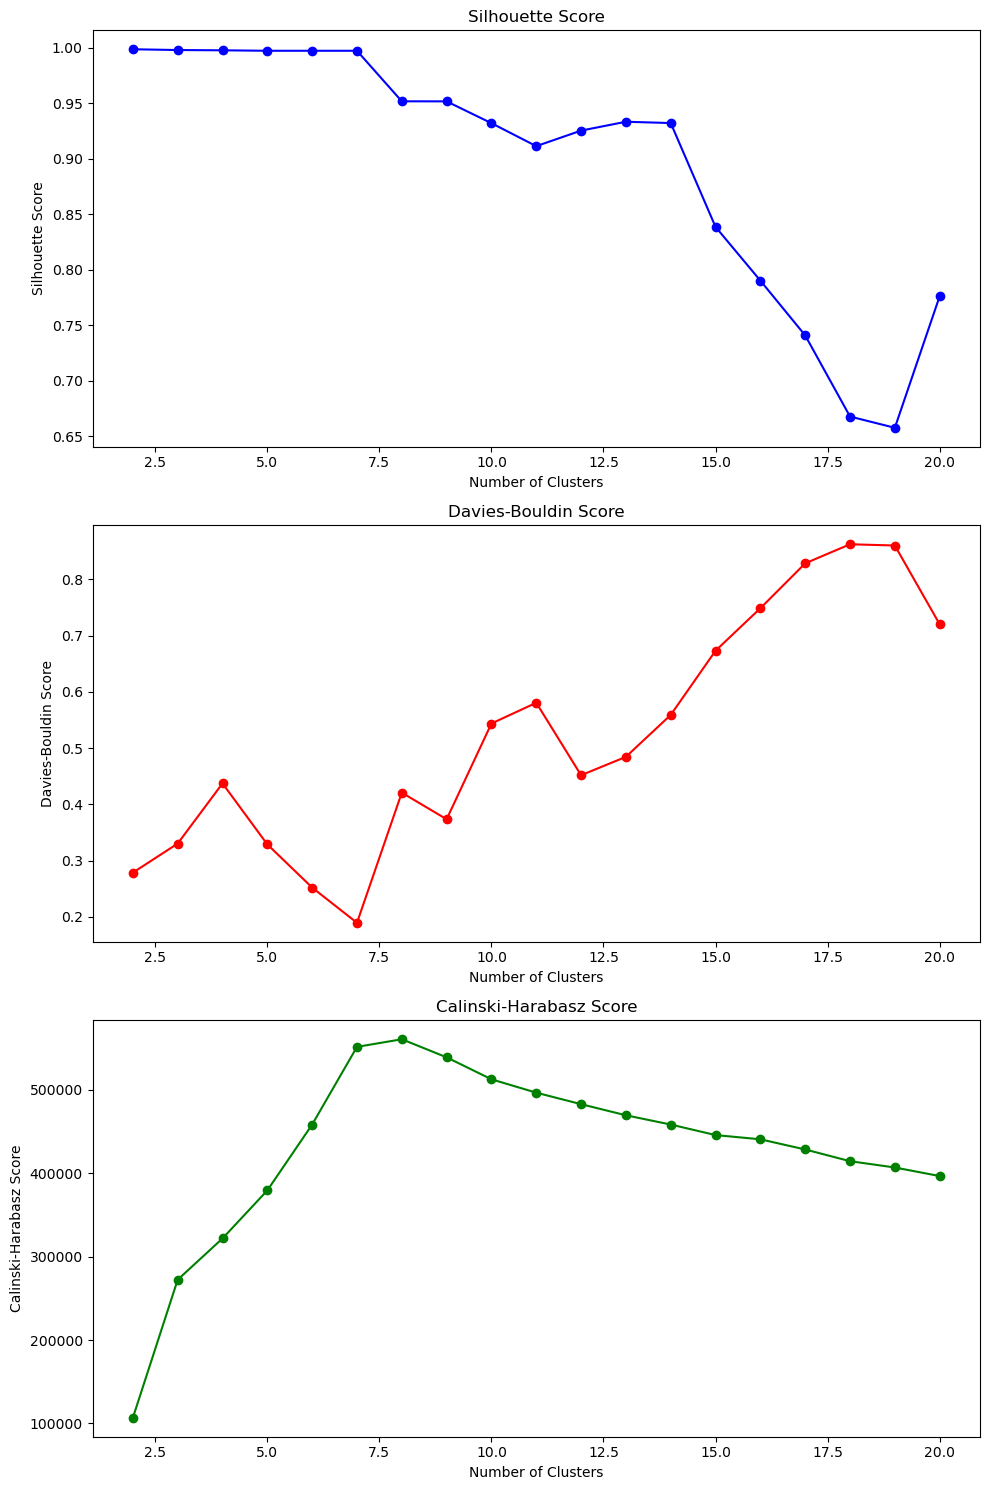

In [7]:
import matplotlib.pyplot as plt
# Plotting the metrics
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# Silhouette Score
axs[0].plot(range(2, 21), silhouette_scores, marker='o', linestyle='-', color='blue')
axs[0].set_title('Silhouette Score')
axs[0].set_xlabel('Number of Clusters')
axs[0].set_ylabel('Silhouette Score')

# Davies-Bouldin Score
axs[1].plot(range(2, 21), davies_bouldin_scores, marker='o', linestyle='-', color='red')
axs[1].set_title('Davies-Bouldin Score')
axs[1].set_xlabel('Number of Clusters')
axs[1].set_ylabel('Davies-Bouldin Score')
plt.tight_layout()
plt.savefig("Davies-Bouldin Score_News_count-Kmeans.png")
# Calinski-Harabasz Score
axs[2].plot(range(2, 21), calinski_harabasz_scores, marker='o', linestyle='-', color='green')
axs[2].set_title('Calinski-Harabasz Score')
axs[2].set_xlabel('Number of Clusters')
axs[2].set_ylabel('Calinski-Harabasz Score')
plt.tight_layout()
plt.savefig("Calinski-Harabasz Score_News_count-Kmeans.png")
plt.tight_layout()
plt.show()

In [8]:
import pandas as pd
data = {'silhouette_scores':silhouette_scores,'davies_bouldin_scores': davies_bouldin_scores,
        'calinski_harabasz_scores': calinski_harabasz_scores}
df=pd.DataFrame(data,index=range(2, 21))

In [9]:
df

,silhouette_scores,davies_bouldin_scores,calinski_harabasz_scores
2,0.998646,0.278629,106797.836290
3,0.997940,0.330303,272345.399313
4,0.997705,0.437208,321845.245376
5,0.997284,0.328826,379437.285198
6,0.997283,0.252125,458407.016416
7,0.997281,0.189507,551544.306445
8,0.951730,0.420767,560677.431263
9,0.951672,0.373505,539024.234753
10,0.932009,0.543664,512665.530239
11,0.911311,0.580535,496631.434285


In [10]:
df.to_csv('Count_Kmeans_Scores.csv')